# MNIST - Digit Recognizer bằng Neural Network

![anh1](https://i.imgur.com/gZmPpMW.png)

# CODE

## Import thư viên

- [numpy](https://numpy.org/) là một gói cơ bản để tính toán với python.
- [matplotlib](http://matplotlib.org) là một thư viện phổ biến để vẽ đồ thị trên python.
- [tensorflow](https://www.tensorflow.org/) là một nền tảng phổ biến cho học máy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential

## Explory Data Analys

**Lấy dữ liệu**

In [3]:
(X_train, y_train), (X_test,y_test)=mnist.load_data()

Trên mỗi ví dụ là một hình ảnh các chữ số viết tay 28 pixel x 28 pixel grayscale.

**Dữ liệu train**

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Tập dữ liệu train chứa 60000 ví dụ, các số từ 0 đến 9.

**Dữ liệu test**

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
Tập dữ liệu train chứa 10000 ví dụ, các số từ 0 đến 9.

**Biểu diễn dữ liệu trên tập train**

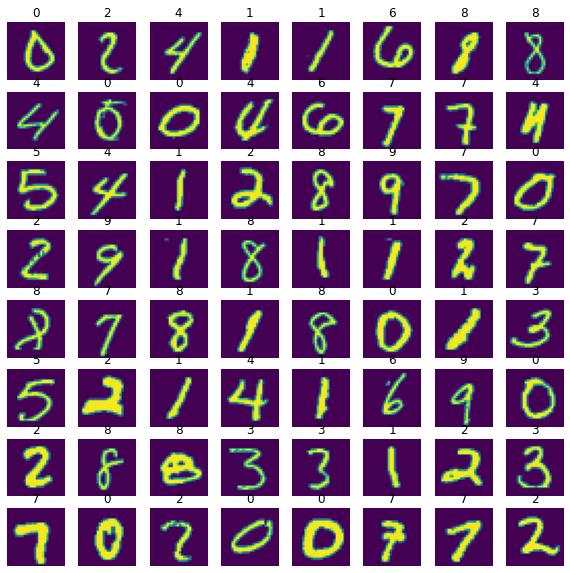

In [11]:
m = X_train.shape[0]
fig, axes = plt.subplots(8,8, figsize=(10,10))
for i,ax in enumerate(axes.flat):
    random_index=np.random.randint(m)
    ax.imshow(X_train[random_index])
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

**Chuyển đổi hình dạng để phù hợp với model**

In [6]:
# Ảnh xám có dạng (M*N*1)
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [7]:
# OneHotEncoding
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

## Training the Model

In [8]:
model=Sequential(
    [
        Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)),
        MaxPooling2D((2,2),strides=2),
        
        Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
        MaxPooling2D((2,2),strides=2),
        
        Flatten(),
        Dense(10,activation='softmax')
    ]
)

In [9]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                15690     
Total params: 34,794
Trainable params: 34,794
Non-trainable params: 0
____________________________________________________

In [13]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2700 - accuracy: 0.9445
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0681 - accuracy: 0.9792
Epoch 3/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0559 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0477 - accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0409 - accuracy: 0.9874


## Predicting Test Data

In [11]:
pred=model.predict(X_test)

In [12]:
pred=np.argmax(pred,axis=1)

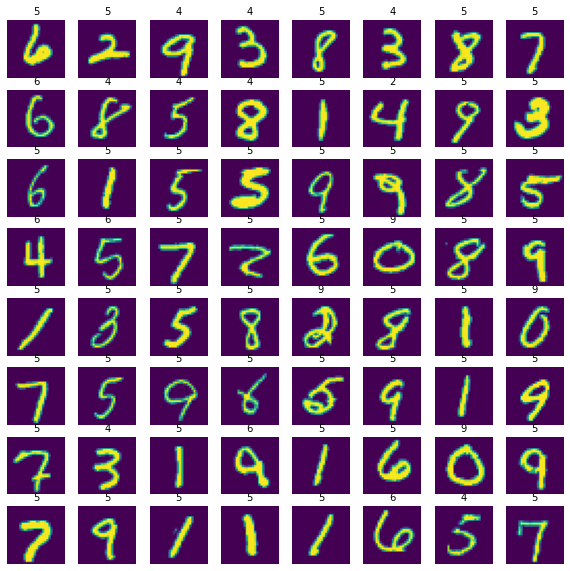

In [13]:
m = X_test.shape[0]
fig, axes = plt.subplots(8,8, figsize=(10,10))
for i,ax in enumerate(axes.flat):
    random_index=np.random.randint(m)
    ax.imshow(X_test[random_index])
    
    ax.set_title(f"{pred[random_index]}",fontsize=10)
    ax.set_axis_off()

## Evaluvating the Model

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0566 - accuracy: 0.9850


[0.056589338928461075, 0.9850000143051147]

Độ chính xác của mô hình là khoảng 98,5%

# Thank you